In [47]:
#Import some libraries for math and plotting
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
from tabulate import tabulate 
colors = ["#e41a1c","#377eb8","#4daf4a","#984ea3","#ff7f00","#ffff33","#a65628","#f781bf"] # Pretty Colors

In [48]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [49]:
burea = pd.read_csv('burea_subset.csv') # import data into dataframe
burea.columns = (['x','y','res','perm']) # clean column names
print burea[1:5] 

    x   y     res    perm
1  15  60  249.17  489.67
2  15  75  243.93  457.78
3  18  27  249.13  360.07
4  18  84  247.02  473.68


In [50]:
#Calculate Covariance: Expects two Vectors of equal length
def covariance(x, y):
    m_x = np.mean(x); m_y = np.mean(y) 
    N = len(x)
    if N != len(y): 
        print "Warning: Covariance cannot be calculated on series of unequal length"
    cov = 0
    for (x_i, y_i) in zip(x,y):
        cov += (x_i - m_x)*(y_i - m_y) # summation of product of deviation from means
    return (1.0 / (N)) * cov

#Calculate Pearson's Correlation Coefficient
def pearsonr(x, y, ddof=1):
    std_x = np.std(x, ddof=ddof) #Standard Deviations
    std_y = np.std(y, ddof=ddof) #Set degrees of freedom to 1 to line up with matlab
    return covariance(x,y) / (std_x * std_y)

def semivariance(near, far):
    s = 0
    for i, near_i in enumerate(near):
        s += (1.0*near[i]-far[i])**2.0 # sum the distance squared of near and far points
    return s / 2.0 * (1.0 / len(near)) # 1/2 * 1/N * summation

** 1) Scatterplot for resisitivity and permeability**

i) Pearson’s Correlation coefficient (ρ) 

ii) Covariance (C)

*See figure below.*


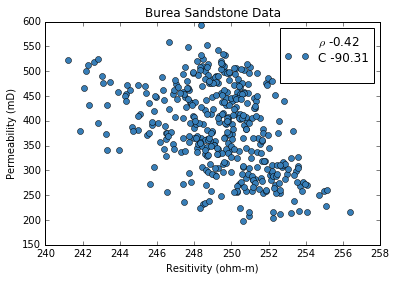

In [51]:
%matplotlib inline

# Calculate Correlation and Covariance
corr = pearsonr(burea['res'],burea['perm'])
cov = covariance(burea['res'],burea['perm'])
rho = r'$\rho$'; cv = 'C'; # labels
l = '{} {}\n{} {}\n'.format(rho,np.round(corr,2),cv, np.round(cov,2))

# Pretty Plotting
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(burea['res'],burea['perm'], "o", color=colors[1], label=l)
ax.set_xlabel("Resitivity (ohm-m)") ; ax.set_ylabel("Permeability (mD)")
ax.set_title("Burea Sandstone Data", fontsize=12)
ax.legend(loc=1);


In [52]:
#calculates the distance between two vector based points
#using a given theta

def distance(x_i, y_i, x_j, y_j, theta):
    if theta == 0 and y_i == y_j: # in same 'row'
        return x_j-x_i
    elif theta == 90 and x_i == x_j: #in same 'column'
        return y_i-y_j
    else: 
        # values are not on the same axis
        # not set up for thetas other than 0,90
        return -1

# returns values from a vector lagged with itself
# requires coordinates for the data as well as theta and desired lag
def lag_vectors(data, x_loc, y_loc, theta, lag):
    z_x = []; z_x_h = [] #vectors of the paired variables of distance: lag wrt theta
    data_copy = data[:] #copy data to compare
    # loop through data points
    for i, data_i in enumerate(data): 
        # loop through again
        for j, data_j in enumerate(data_copy):
            # calculate distance between the two points
            if distance(x_loc[i], y_loc[i], x_loc[j], y_loc[j], theta) == lag:
                #if separated by lag on correct axis, add values to the two vectors
                z_x.append(data_i)
                z_x_h.append(data_j)
    return z_x, z_x_h

**2) For resistivity at lag distances of 3, 9, 24, 36, 54, and 72 mm in the horizontal direction (theta=0), find:**

i) Correlation coefficient (ρ) ii) Covariance (C)
iii) Semivariance (γ)

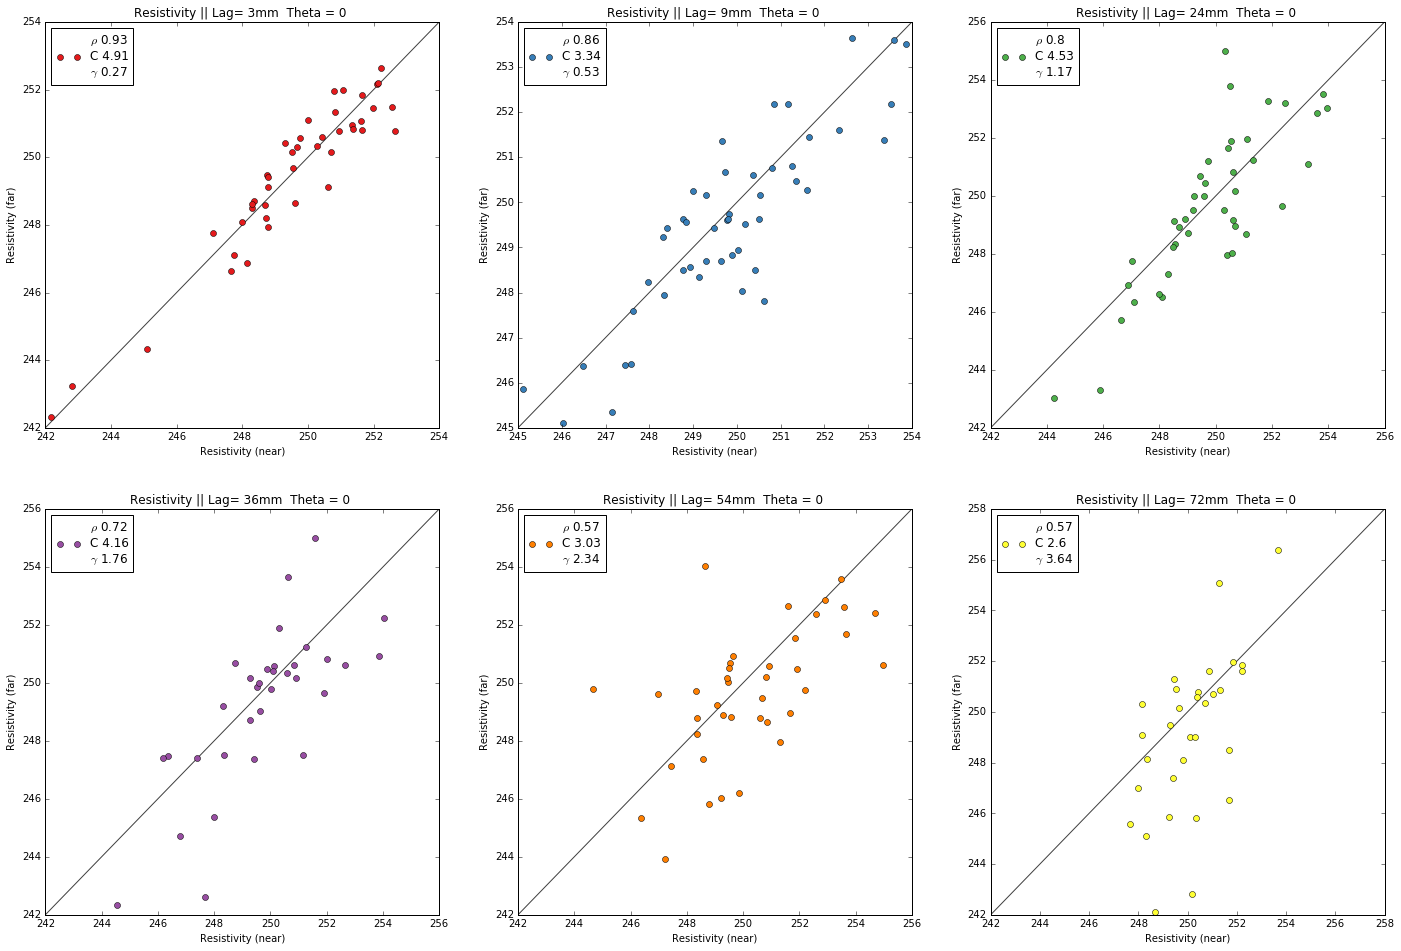

In [53]:
lags = [3,9,24,36,54,72]  # lags in a vector
hcorr = []; hsemi = []
theta = 0
nrows = int(np.ceil(len(lags) / 3))
fig, axs = plt.subplots(nrows, 3, figsize=(24,16))
i = 0
corr = r'$\rho$'; cv = 'C'; sv = '$\gamma$'
for ax, lag in zip(axs.flat, lags):
    near, far = lag_vectors(burea['res'].tolist(), burea['x'].tolist(), burea['y'].tolist(),theta,lag)
    this_corr = pearsonr(near,far); hcorr.append(this_corr)
    this_cov = covariance(near,far)
    this_semi = semivariance(near,far); hsemi.append(this_semi)
    l = '{} {}\n{} {}\n{} {}'.format(corr,np.round(this_corr,2),cv,np.round(this_cov,2),
                                    sv,np.round(this_semi,2))
    ax.plot(near, far, 'o', color=colors[i], label = l)
    lims = [ np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
            np.max([ax.get_xlim(), ax.get_ylim()])]  # max of both axes
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    ax.legend(loc=2)
    ax.set_xlabel("Resistivity (near)")
    ax.set_ylabel("Resistivity (far)")
    title = 'Resistivity || Lag= {}mm  Theta = {} '.format(lag, theta)
    ax.set_title(title, fontsize=12)
    i+=1

**3) For resistivity at lag distances of 3, 9, 24, 36, 54, and 72 mm in the vertical direction (theta=90), find:**

i) Correlation coefficient (ρ)
ii) Covariance (C)
iii) Semivariance (γ)


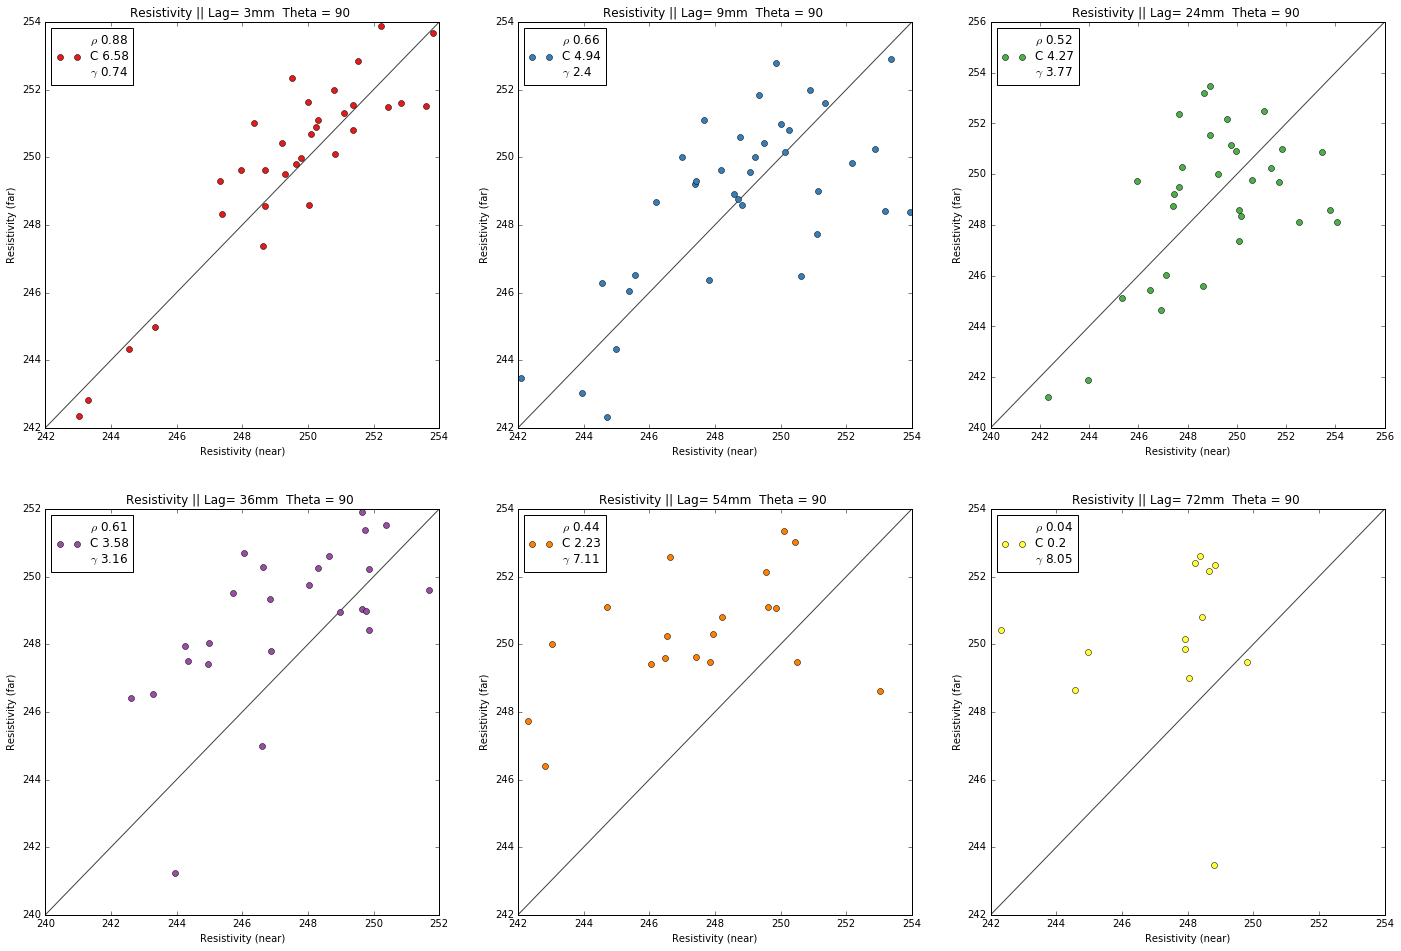

In [54]:
lags = [3,9,24,36,54,72]  # lags in a vector
vcorr = []; vcov = []; vsemi = [] 
theta = 90
nrows = int(np.ceil(len(lags) / 3))
fig, axs = plt.subplots(nrows, 3, figsize=(24,16))
i = 0
corr = r'$\rho$'; cv = 'C'; sv = '$\gamma$'
for ax, lag in zip(axs.flat, lags):
    near, far = lag_vectors(burea['res'].tolist(), burea['x'].tolist(), burea['y'].tolist(),theta,lag)
    this_corr = pearsonr(near,far); vcorr.append(this_corr)
    this_cov = covariance(near,far)
    this_semi = semivariance(near,far); vsemi.append(this_semi)
    l = '{} {}\n{} {}\n{} {}'.format(corr,np.round(this_corr,2),cv,np.round(this_cov,2),
                                    sv,np.round(this_semi,2))
    ax.plot(near, far, 'o', color=colors[i], label = l)
    lims = [ np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
            np.max([ax.get_xlim(), ax.get_ylim()])]  # max of both axes
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    ax.legend(loc=2)
    ax.set_xlabel("Resistivity (near)")
    ax.set_ylabel("Resistivity (far)")
    title = 'Resistivity || Lag= {}mm  Theta = {} '.format(lag, theta)
    ax.set_title(title, fontsize=12)
    i+=1

**4) Is resistivity more correlated in the horizontal direction or the vertical direction? What would be your estimate of the extent of the spatial correlation in each direction (i.e., the distance where there is no more correlation)?**

Resistivity is more correlated in the horizontal distance at every lag (althoguh they are fairly close at 3mm and 36mm). Even at 72 mm, there is some spatial correlation in the horizontal direction. However, in the vertical direction, at 72 mm the correlation approaches 0.

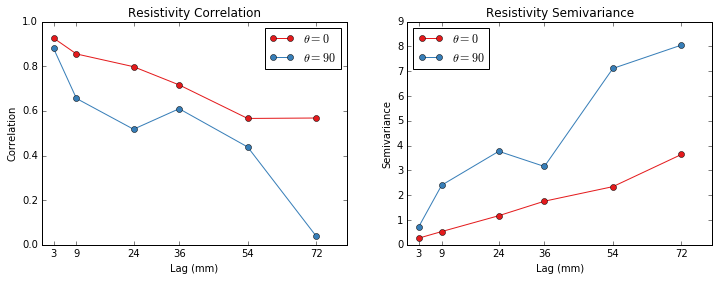

In [55]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,4))
ax1.plot(lags, hcorr,"o-", color=colors[0], label=r'$\theta = 0$')
ax1.plot(lags, vcorr,"o-", color=colors[1], label=r'$\theta = 90$')
plt.legend()
ax1.set_xlabel("Lag (mm)")
ax1.set_ylabel("Correlation")
ax1.set_title("Resistivity Correlation", fontsize=12)
ax1.set_xticks(lags)
ax1.legend(loc=1)
ax2.plot(lags, hsemi,"o-", color=colors[0], label=r'$\theta = 0$')
ax2.plot(lags, vsemi,"o-", color=colors[1], label=r'$\theta = 90$')
ax2.set_xticks(lags)
ax2.legend(loc=2)
ax2.set_xlabel("Lag (mm)")
ax2.set_ylabel("Semivariance")
ax2.set_title("Resistivity Semivariance", fontsize=12);